In [3]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from scipy import stats
df = pd.read_csv('sost_Trace.csv')
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [4]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [37]:
def divMap(df, n):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            vx.append((df['x'][i]-df['x'][i-1])/(df['time'][i]-df['time'][i-1]))
            vy.append((df['y'][i]-df['y'][i-1])/(df['time'][i]-df['time'][i-1]))
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            div.append(vvx/dx + vvy/dy)
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "divergence", div)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    return dfn

In [39]:
dfn = divMap(df, 15)

## По нескольким мышам усредним

In [42]:
%matplotlib inline

In [40]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

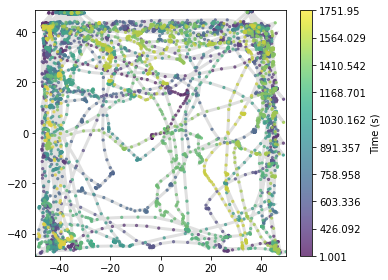

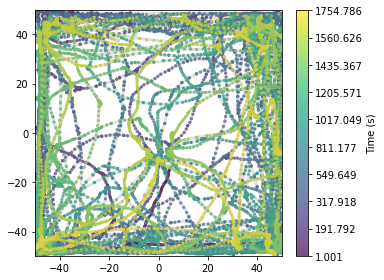

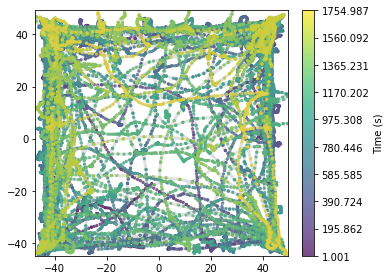

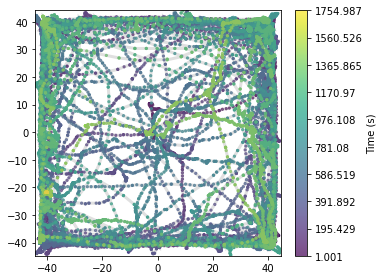

In [43]:
tr3 = openFile('Trace_3.txt')
tr5 = openFile('Trace_5.txt')
tr6 = openFile('Trace_6.txt')
tr9 = openFile('Trace_9.1.txt')

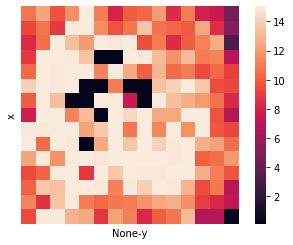

In [46]:
div3 = divMap(tr3, 15)

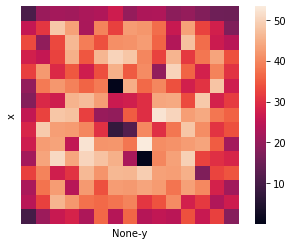

In [47]:
div5 = divMap(tr5, 15)

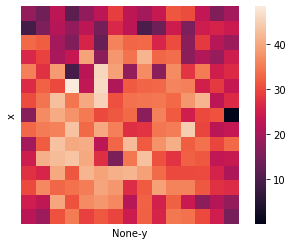

In [48]:
div6 = divMap(tr6, 15)

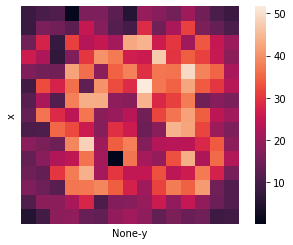

In [49]:
div9 = divMap(tr9, 15)

<AxesSubplot:>

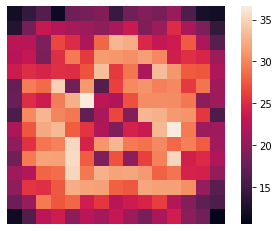

In [50]:
divMean = np.mean(np.array([ div3, div5, div6, div9 ]), axis=0 )
sns.heatmap(divMean, square=True, xticklabels=False, yticklabels=False)
#блин тут другая ось справа... мб стоит нормализовать

## Нормализуем df

In [36]:
dfnn = dfn.fillna(0.1)
arrd = dfnn.to_numpy()
arrl = np.log(arrd)
arrsr = np.sqrt(arrd)
sns.heatmap(arrsr, robust=False, square=True, xticklabels=False, yticklabels=False)

<AxesSubplot:>

In [23]:
dfn

divergence                                        \
y                  [-48.872, -42.368) [-42.368, -35.865) [-35.865, -29.361)   
x                                                                             
[-49.819, -43.176)          10.680486          12.371709           9.558976   
[-43.176, -36.534)           9.263934          10.671183           8.882073   
[-36.534, -29.891)           8.311688          10.540447          14.981484   
[-29.891, -23.249)           8.900516          15.009539          15.000187   
[-23.249, -16.606)          10.367480          14.981484          14.962780   
[-16.606, -9.964)           14.042350          14.981484          14.953428   
[-9.964, -3.321)             9.987656          14.981484          13.329343   
[-3.321, 3.321)              7.738178          15.037594          14.981484   
[3.321, 9.964)              14.925373          14.925373          15.005531   
[9.964, 16.606)             15.000187          11.135204          15.000187   
[16.606, 23.249)            11.598829          14.973468          11.646030   
[23.249, 29.891)             9.607655          10.176026          14.981484   
[29.891, 36.534)            10.486951          13.619531          13.407438   
[36.534, 43.176)            11.236113           8.992631          13.488946   
[43.176, 49.819)             9.635788          14.944077          14.981484   

                                                                           \
y                  [-29.361, -22.858) [-22.858, -16.354) [-16.354, -9.85)   
x                                                                           
[-49.819, -43.176)          11.543315          14.981484        10.990162   
[-43.176, -36.534)          14.959039          15.012656        11.462580   
[-36.534, -29.891)          13.316874          11.985187        14.992706   
[-29.891, -23.249)          14.962780          13.477724              NaN   
[-23.249, -16.606)          14.981484          15.000187        11.231437   
[-16.606, -9.964)           15.037594                NaN              NaN   
[-9.964, -3.321)                  NaN                NaN        12.936004   
[-3.321, 3.321)             11.222085          13.500168        14.962780   
[3.321, 9.964)              14.981484          11.236113        13.562691   
[9.964, 16.606)             14.925373                NaN        12.475218   
[16.606, 23.249)            14.981484          14.995511        14.970261   
[23.249, 29.891)            14.981484           8.788054        14.981484   
[29.891, 36.534)            15.037594          15.000187        14.962780   
[36.534, 43.176)            14.972132          11.268844        10.473946   
[43.176, 49.819)            12.849287          12.484570         8.767965   

                                                                  \
y                  [-9.85, -3.347) [-3.347, 3.157) [3.157, 9.66)   
x                                                                  
[-49.819, -43.176)        8.048876       10.216027      7.060680   
[-43.176, -36.534)        9.371790       11.240789     13.316874   
[-36.534, -29.891)       14.925373       15.009539      9.538772   
[-29.891, -23.249)             NaN       15.037594     14.947817   
[-23.249, -16.606)       15.037594       12.484570     12.857303   
[-16.606, -9.964)        10.990162             NaN     14.992706   
[-9.964, -3.321)         15.009539        7.481390           NaN   
[-3.321, 3.321)          15.009539       14.308158     15.000187   
[3.321, 9.964)           14.989499       10.568564     14.987718   
[9.964, 16.606)          14.985800       13.329343     14.981484   
[16.606, 23.249)         14.981484       15.000187     15.037594   
[23.249, 29.891)         13.619531       15.000187     14.962780   
[29.891, 36.534)         11.124344       14.962780     13.923401   
[36.534, 43.176)         11.115832       10.846726     11.562062   
[43.176, 49.819)         12.229027       10.727853      8.369

In [22]:
df1 = dfn[dfn.isnull().any(axis=1)]
df1

divergence                                        \
y                  [-48.872, -42.368) [-42.368, -35.865) [-35.865, -29.361)   
x                                                                             
[-29.891, -23.249)           8.900516          15.009539          15.000187   
[-16.606, -9.964)           14.042350          14.981484          14.953428   
[-9.964, -3.321)             9.987656          14.981484          13.329343   
[9.964, 16.606)             15.000187          11.135204          15.000187   
[16.606, 23.249)            11.598829          14.973468          11.646030   

                                                                           \
y                  [-29.361, -22.858) [-22.858, -16.354) [-16.354, -9.85)   
x                                                                           
[-29.891, -23.249)          14.962780          13.477724              NaN   
[-16.606, -9.964)           15.037594                NaN              NaN   
[-9.964, -3.321)                  NaN                NaN        12.936004   
[9.964, 16.606)             14.925373                NaN        12.475218   
[16.606, 23.249)            14.981484          14.995511        14.970261   

                                                                  \
y                  [-9.85, -3.347) [-3.347, 3.157) [3.157, 9.66)   
x                                                                  
[-29.891, -23.249)             NaN       15.037594     14.947817   
[-16.606, -9.964)        10.990162             NaN     14.992706   
[-9.964, -3.321)         15.009539        7.481390           NaN   
[9.964, 16.606)          14.985800       13.329343     14.981484   
[16.606, 23.249)         14.981484       15.000187     15.037594   

                                                                     \
y                  [9.66, 16.164) [16.164, 22.668) [22.668, 29.171)   
x                                                                     
[-29.891, -23.249)      13.594382        11.658499        13.635604   
[-16.606, -9.964)       11.783189        14.100220        14.994432   
[-9.964, -3.321)        14.981484        13.488946        12.680956   
[9.964, 16.606)         13.829062        14.975249        15.000187   
[16.606, 23.249)              NaN        14.925373        14.992706   

                                                                       
y                  [29.171, 35.675) [35.675, 42.178) [42.178, 48.682)  
x                                                                      
[-29.891, -23.249)        11.093239         9.347432         7.109764  
[-16.606, -9.964)         13.737702         9.477711         9.295084  
[-9.964, -3.321)          11.988928        10.587663         8.217127  
[9.964, 16.606)           12.732417        12.342093        10.154177  
[16.606, 23.249)          10.116710        10.544207        11.924995

In [16]:
dfn.isnull().values.any()

True

In [16]:
dfn = divMap(df, 30)

In [15]:
dfn

divergence                                        \
y                  [-48.772, -45.527) [-45.527, -42.282) [-42.282, -39.037)   
x                                                                             
[-49.719, -46.404)           9.579788          13.115812           9.577368   
[-46.404, -43.09)           12.056564           9.439020          13.162697   
[-43.09, -39.775)            9.702167          10.468030          13.115812   
[-39.775, -36.461)           9.987656           7.696747          13.115812   
[-36.461, -33.146)          11.102525          10.050600           9.276924   
[-33.146, -29.831)           2.714599           7.504769          14.925373   
[-29.831, -26.517)                NaN           8.702546          15.037594   
[-26.517, -23.202)                NaN          15.037594          15.037594   
[-23.202, -19.888)                NaN                NaN          15.037594   
[-19.888, -16.573)                NaN          10.367480          14.925373   
[-16.573, -13.258)                NaN          15.000187          15.037594   
[-13.258, -9.944)                 NaN          12.318243                NaN   
[-9.944, -6.629)                  NaN          14.981484                NaN   
[-6.629, -3.315)            15.037594           9.158468                NaN   
[-3.315, 0.0)                     NaN           7.395146                NaN   
[0.0, 3.315)                      NaN                NaN          15.037594   
[3.315, 6.629)                    NaN          14.925373                NaN   
[6.629, 9.944)                    NaN                NaN          14.925373   
[9.944, 13.258)                   NaN          15.037594          15.009539   
[13.258, 16.573)                  NaN          15.000187          11.985187   
[16.573, 19.888)             7.490637          11.770844          14.953428   
[19.888, 23.202)                  NaN          12.007631          14.981484   
[23.202, 26.517)             7.916240           9.737954          10.575165   
[26.517, 29.831)            12.462743                NaN           8.341750   
[29.831, 33.146)            10.985660           9.370441          14.981484   
[33.146, 36.461)             9.987656          11.231437          12.493921   
[36.461, 39.775)             0.000000          15.037594          14.925373   
[39.775, 43.09)             15.037594          12.475218          15.037594   
[43.09, 46.404)              9.054636          10.147037          14.925373   
[46.404, 49.719)             9.835319           9.852851                NaN   

                                                                             \
y                  [-39.037, -35.791) [-35.791, -32.546) [-32.546, -29.301)   
x                                                                             
[-49.719, -46.404)          15.037594          14.925373          10.725107   
[-46.404, -43.09)           12.633705           8.128132          13.639934   
[-43.09, -39.775)            9.538772           7.043509          10.025063   
[-39.775, -36.461)           7.476714          15.037594          14.925373   
[-36.461, -33.146)          14.981484          15.037594          14.981484   
[-33.146, -29.831)          14.962780          14.925373          14.981484   
[-29.831, -26.517)          14.925373          14.981484                NaN   
[-26.517, -23.202)                NaN          15.037594          15.037594   
[-23.202, -19.888)          14.925373          14.962780                NaN   
[-19.888, -16.573)          15.037594                NaN                NaN   
[-16.573, -13.258)          14.925373          14.925373          14.925373   
[-13.258, -9.944)                 NaN                NaN          14.981484   
[-9.944, -6.629)            15.037594          15.037594          15.037594   
[-6.629, -3.315)            14.925373                NaN          12.841272   
[-3.315, 0.0)               15.037594          14.925373          15.037594 